<a href="https://colab.research.google.com/github/kaayyt/Netflix-Data-Analysis-and-Basic-ML/blob/main/Netflix%20analyis%20and%20basic%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving netflix1.csv to netflix1 (1).csv
netflix1 (1).csv uploaded successfully!
Missing values in each column:
 show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Duplicates dropped (if any).

Rows with missing critical information (director, country) dropped.

'date_added' column converted to datetime format.

Data types after correction:
 show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


<ipython-input-3-e2a4d547b941>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


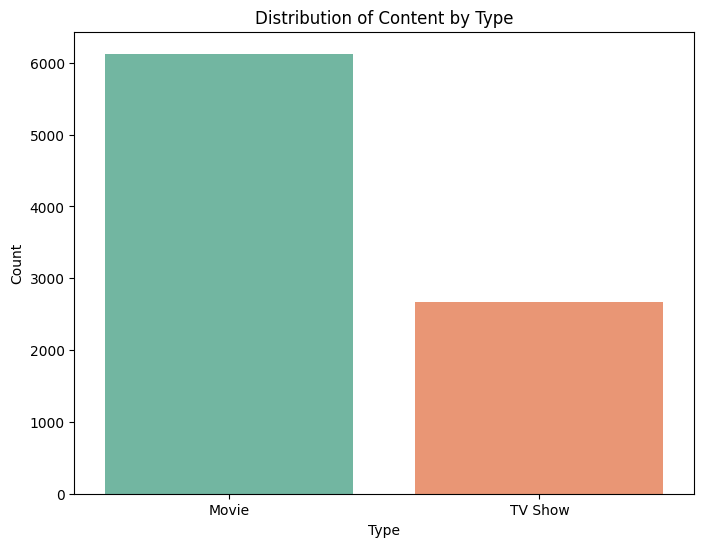

<ipython-input-3-e2a4d547b941>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')


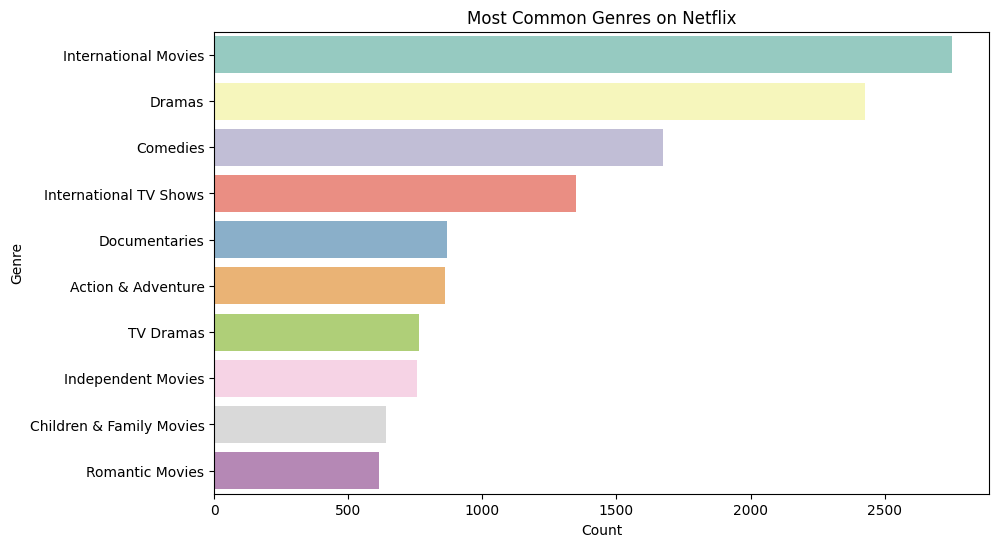

<ipython-input-3-e2a4d547b941>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, palette='coolwarm')


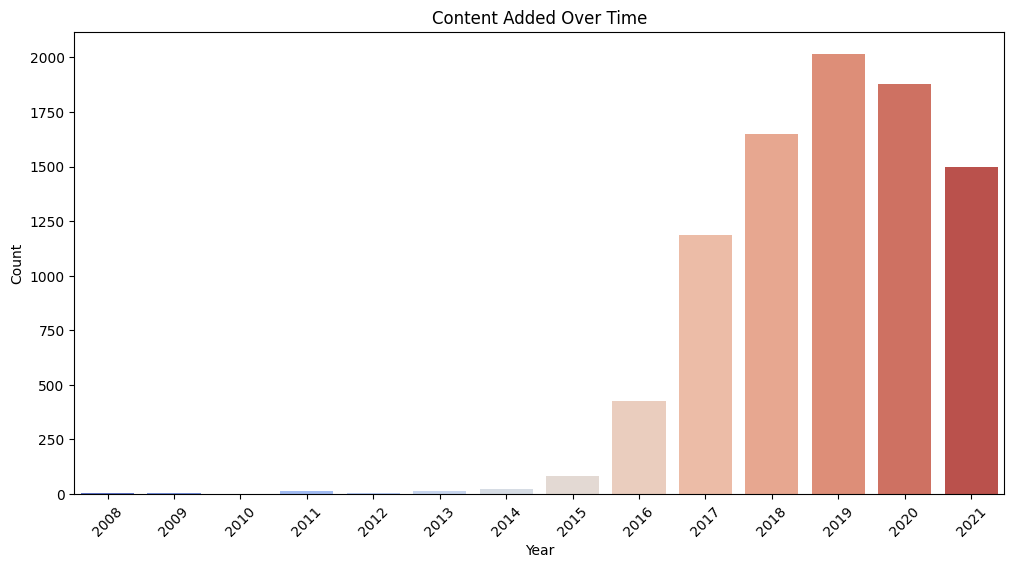

<ipython-input-3-e2a4d547b941>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')


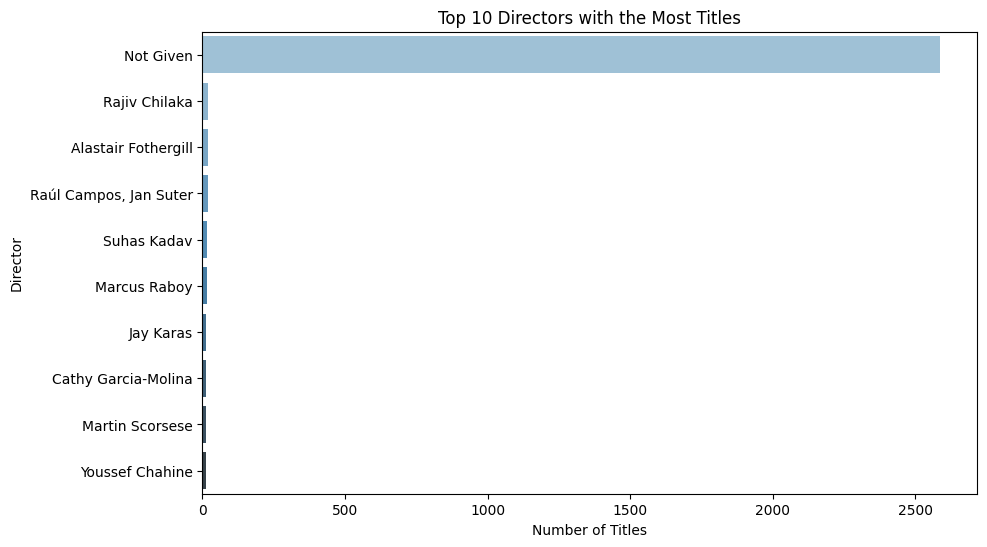

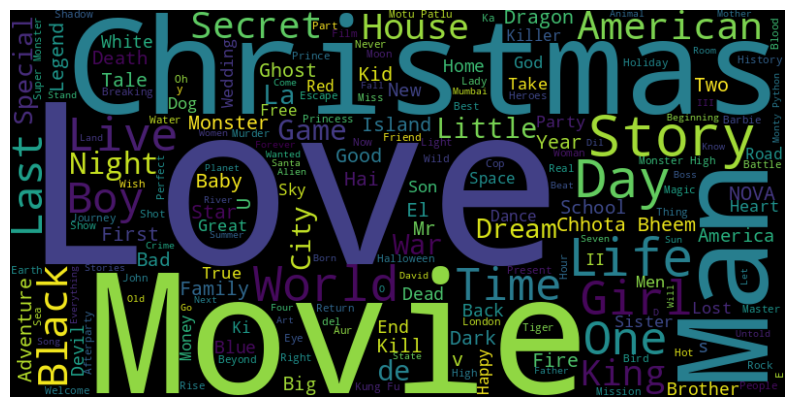

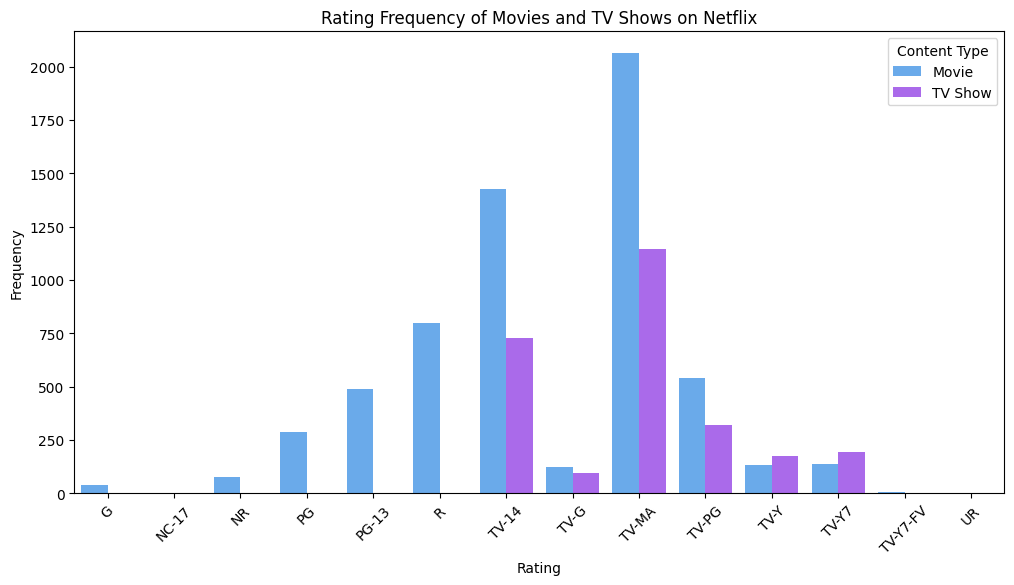

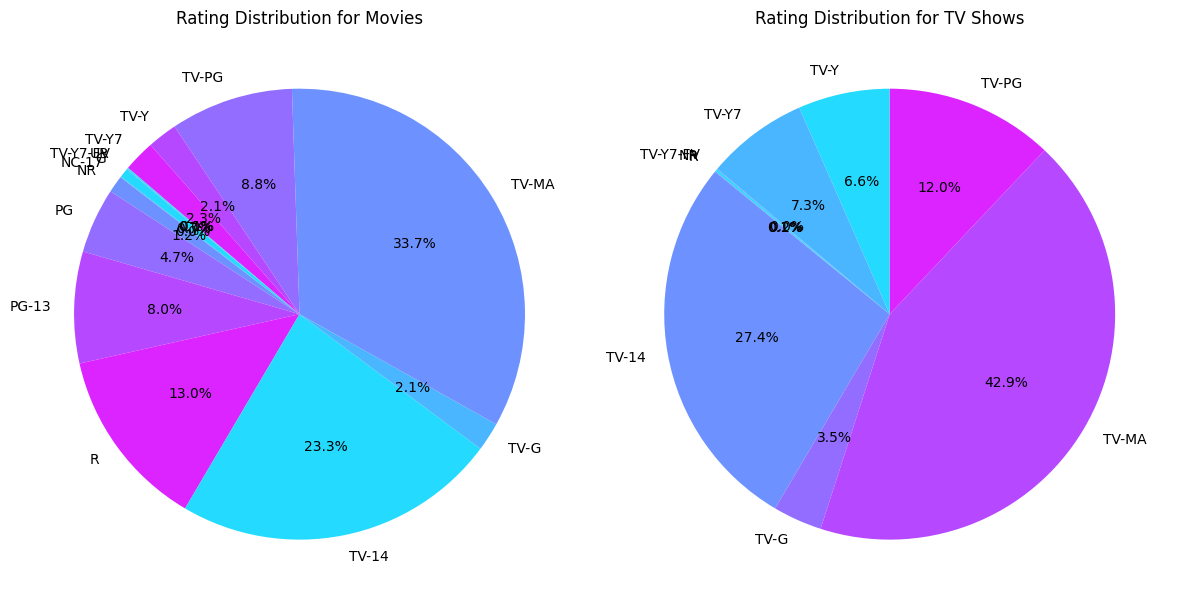

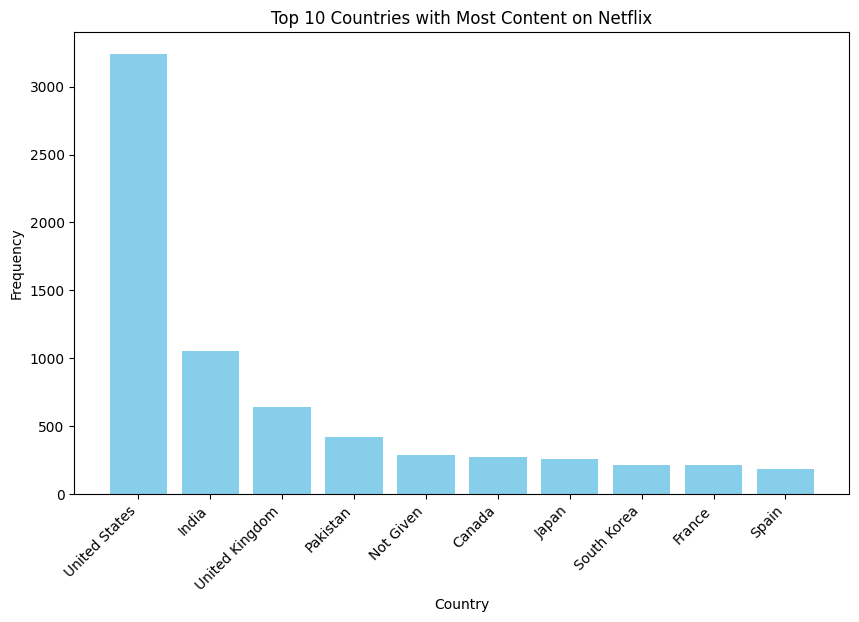

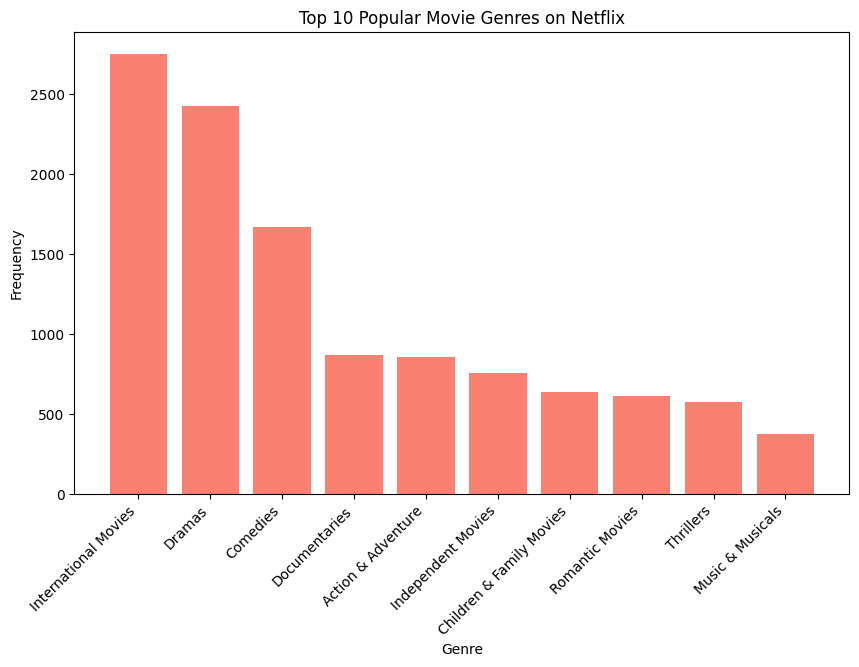

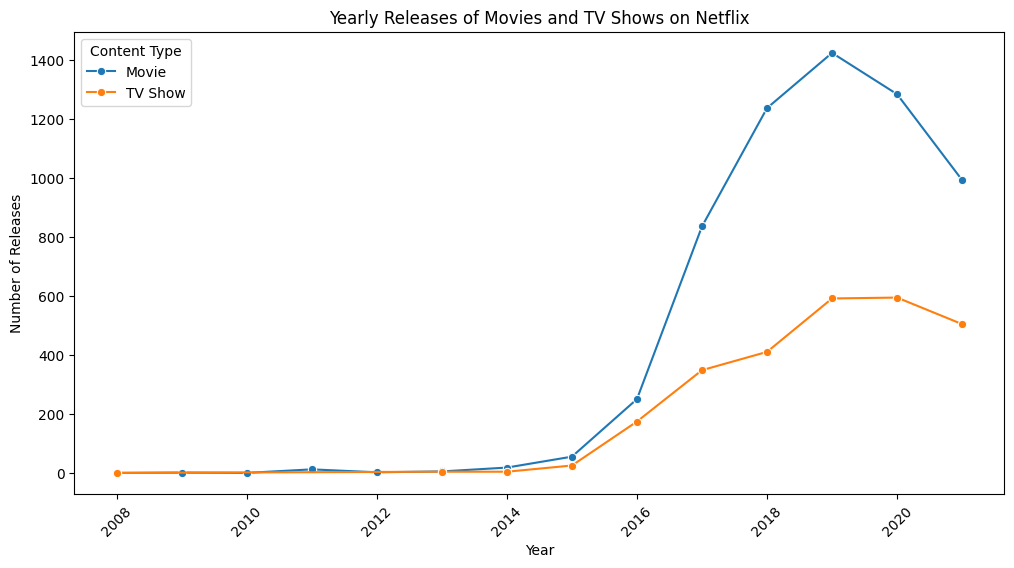

In [3]:
# Import required modules
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Prompt user to upload a file
uploaded = files.upload()

# Load the CSV into a Pandas DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    print(f'{filename} uploaded successfully!')

# Step 2: Data Cleaning

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)
print("\nDuplicates dropped (if any).")

# Check if the required columns exist in the DataFrame
required_columns = ['director', 'cast', 'country']
for column in required_columns:
    if column not in df.columns:
        print(f"Warning: Column '{column}' not found in DataFrame. Skipping this column for dropna.")
        required_columns.remove(column)  # Remove the missing column from the list

# Drop rows with missing critical information in specified columns (if they exist)
if required_columns:  # Proceed only if there are valid columns left
    df.dropna(subset=required_columns, inplace=True)
    print(f"\nRows with missing critical information ({', '.join(required_columns)}) dropped.")

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
print("\n'date_added' column converted to datetime format.")

# Show data types to confirm changes
print("\nData types after correction:\n", df.dtypes)

# Step 3: Exploratory Data Analysis (EDA)

# Content Type Distribution (Movies vs. TV Shows)
type_counts = df['type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Extract Genres
df['genres'] = df['listed_in'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])
all_genres = sum(df['genres'], [])

# Count the occurrences of each genre and get the top 10 most common genres
genre_counts = pd.Series(all_genres).value_counts().head(10)

# Plot the Most Common Genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Plot Content Added Over the Years
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=df, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count Titles by Director
top_directors = df['director'].value_counts().head(10)

# Plot Top Directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

# Generate Word Cloud for Movie Titles
movie_titles = df[df['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Filter and Count Ratings for Movies and TV Shows
rating_counts = df.groupby(['type', 'rating']).size().reset_index(name='count')

# Plot Rating Frequency for Movies and TV Shows
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='count', hue='type', data=rating_counts, palette='cool')
plt.title('Rating Frequency of Movies and TV Shows on Netflix')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.show()

# Separate the data for Movies and TV Shows
movie_ratings = rating_counts[rating_counts['type'] == 'Movie']
tv_show_ratings = rating_counts[rating_counts['type'] == 'TV Show']

# Plot Pie Chart for Movie Ratings
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(movie_ratings['count'], labels=movie_ratings['rating'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("cool"))
plt.title('Rating Distribution for Movies')

# Plot Pie Chart for TV Show Ratings
plt.subplot(1, 2, 2)
plt.pie(tv_show_ratings['count'], labels=tv_show_ratings['rating'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("cool"))
plt.title('Rating Distribution for TV Shows')
plt.tight_layout()
plt.show()

# Get Top 10 Countries with the Most Content
top_ten_countries = df['country'].value_counts().head(10).reset_index()
top_ten_countries.columns = ['country', 'count']

# Plot Top 10 Countries with the Most Content
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'], top_ten_countries['count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Top 10 Countries with Most Content on Netflix")
plt.show()

# Extract Genres for Movies
movie_genres = df[df['type'] == 'Movie']['listed_in'].str.split(', ')
all_movie_genres = sum(movie_genres.dropna().tolist(), [])

# Count occurrences of each genre and select the top 10
top_ten_movie_genres = pd.Series(all_movie_genres).value_counts().head(10).reset_index()
top_ten_movie_genres.columns = ['genre', 'count']

# Plot Top 10 Popular Movie Genres
plt.figure(figsize=(10, 6))
plt.bar(top_ten_movie_genres['genre'], top_ten_movie_genres['count'], color='salmon')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.title("Top 10 Popular Movie Genres on Netflix")
plt.show()

# Yearly releases of movie and tv shows on netflix
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Filter and Count Yearly Releases by Type (Movies and TV Shows)
yearly_releases = df.groupby(['year_added', 'type']).size().reset_index(name='count')

# Plot Yearly Releases of Movies and TV Shows
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_releases, x='year_added', y='count', hue='type', marker='o')
plt.title('Yearly Releases of Movies and TV Shows on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.show()


In [12]:
# Feature 1: Count the number of genres per movie/show
df['num_genres'] = df['genres'].apply(len)

# Feature 2: Extract duration for movies (in minutes) - Only for movies
df['duration'] = df['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else None)


In [14]:
# Feature 1: Count the number of genres per movie/show
df['num_genres'] = df['genres'].apply(len)

# Feature 2: Extract duration for movies (in minutes) - Only for movies
df['duration'] = df['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else None)

# Create 'is_popular' column based on some criteria (example: more than 5 genres is popular)
# Adjust the condition as needed for your definition of 'popularity'
df['is_popular'] = (df['num_genres'] > 5).astype(int) # 1 for popular, 0 otherwise

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'is_popular' is the target variable, you can adjust based on your requirement
X = df[['num_genres', 'duration']]  # Features: number of genres and duration
y = df['is_popular']  # Target: 1 if popular, 0 if not

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Confusion Matrix:
[[1758]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1758

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [15]:
import plotly.express as px

# Interactive plot of the number of genres vs. movie popularity
fig = px.scatter(df, x='num_genres', y='is_popular', color='is_popular',
                 title='Number of Genres vs. Popularity',
                 labels={'num_genres': 'Number of Genres', 'is_popular': 'Popularity (0=Not Popular, 1=Popular)'})
fig.show()


In [16]:
import dash
from dash import dcc, html
import plotly.express as px

# Initialize the Dash app
app = dash.Dash(__name__)

# Create interactive plots for the dashboard
fig1 = px.scatter(df, x='num_genres', y='duration', color='is_popular',
                  title='Number of Genres vs Duration')

fig2 = px.bar(df, x='year_added', y='count', color='type',
              title='Content Added Over Time')

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Netflix Data Analysis Dashboard"),
    dcc.Graph(figure=fig1),
    dcc.Graph(figure=fig2),
])

# Run the server
if __name__ == '__main__':
    app.run_server(debug=True)


ModuleNotFoundError: No module named 'dash'

In [18]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd # Import pandas for data manipulation

# Initialize the Dash app
app = dash.Dash(__name__)

# Create interactive plots for the dashboard
fig1 = px.scatter(df, x='num_genres', y='duration', color='is_popular',
                  title='Number of Genres vs Duration')

# Group by 'year_added' and 'type' and count the occurrences
df_content_added = df.groupby(['year_added', 'type'])['show_id'].count().reset_index(name='count')
# 'show_id' can be any column, we just need to count

fig2 = px.bar(df_content_added, x='year_added', y='count', color='type',
              title='Content Added Over Time')

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Netflix Data Analysis Dashboard"),
    dcc.Graph(figure=fig1),
    dcc.Graph(figure=fig2),
])

# Run the server
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>